In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [7]:
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2024-12-31'

data = yf.download(ticker, start=start_date, end=end_date)

data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace=True)

# Reset index to use date as a column
data.reset_index(inplace=True)

# Show the first few rows
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.746222,24.757330,23.848702,24.288576,212818400
1,2015-01-05,24.057535,24.137513,23.417720,23.604332,257142000
2,2015-01-06,23.668756,23.866477,23.244433,23.606552,263188400
3,2015-01-07,23.815377,24.037535,23.704298,23.937565,160423600
4,2015-01-08,24.266369,24.915071,24.148623,24.857309,237458000


In [27]:
data.columns = data.columns.get_level_values(0)

data['Return'] = data['Close'].pct_change()
data['Volatility'] = data['Return'].rolling(window=10).std()
data_clean = data.dropna(subset=['Return', 'Volatility'])

print(data_clean[['Date', 'Volume', 'Return', 'Volatility']].head())



Price       Date     Volume    Return  Volatility
10    2015-01-16  314053200 -0.007770    0.020765
11    2015-01-20  199599600  0.025757    0.020475
12    2015-01-21  194303600  0.007634    0.020516
13    2015-01-22  215185600  0.026015    0.021541
14    2015-01-23  185859200  0.005160    0.017986


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
features = ['Volume', 'Return', 'Volatility']
X = data_clean[features]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Scaled features shape:", X_scaled.shape)
print("First 5 rows of scaled features:\n", X_scaled[:5])

Scaled features shape: (2505, 3)
First 5 rows of scaled features:
 [[ 2.89619397 -0.49528054  0.56762341]
 [ 1.21667355  1.37600741  0.5339585 ]
 [ 1.13895874  0.3645185   0.53869093]
 [ 1.44538637  1.39044211  0.65752286]
 [ 1.01504352  0.22642016  0.2453774 ]]


In [30]:
iso_forest = IsolationForest(n_estimators = 100, contamination= 0.01, random_state = 42)
iso_forest.fit(X_scaled)
anomaly_pred = iso_forest.predict(X_scaled)
data_clean['Anomaly_IF'] = (anomaly_pred== -1).astype(int)

print(data_clean[['Date', 'Volume', 'Return', 'Volatility', 'Anomaly_IF']].head())

Price       Date     Volume    Return  Volatility  Anomaly_IF
10    2015-01-16  314053200 -0.007770    0.020765           0
11    2015-01-20  199599600  0.025757    0.020475           0
12    2015-01-21  194303600  0.007634    0.020516           0
13    2015-01-22  215185600  0.026015    0.021541           0
14    2015-01-23  185859200  0.005160    0.017986           0


/var/folders/4n/v99tzv313kn5qt7t9_b3tc880000gn/T/ipykernel_10580/1920516240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Anomaly_IF'] = (anomaly_pred== -1).astype(int)


In [31]:
print(data_clean['Anomaly_IF'].sum())

26


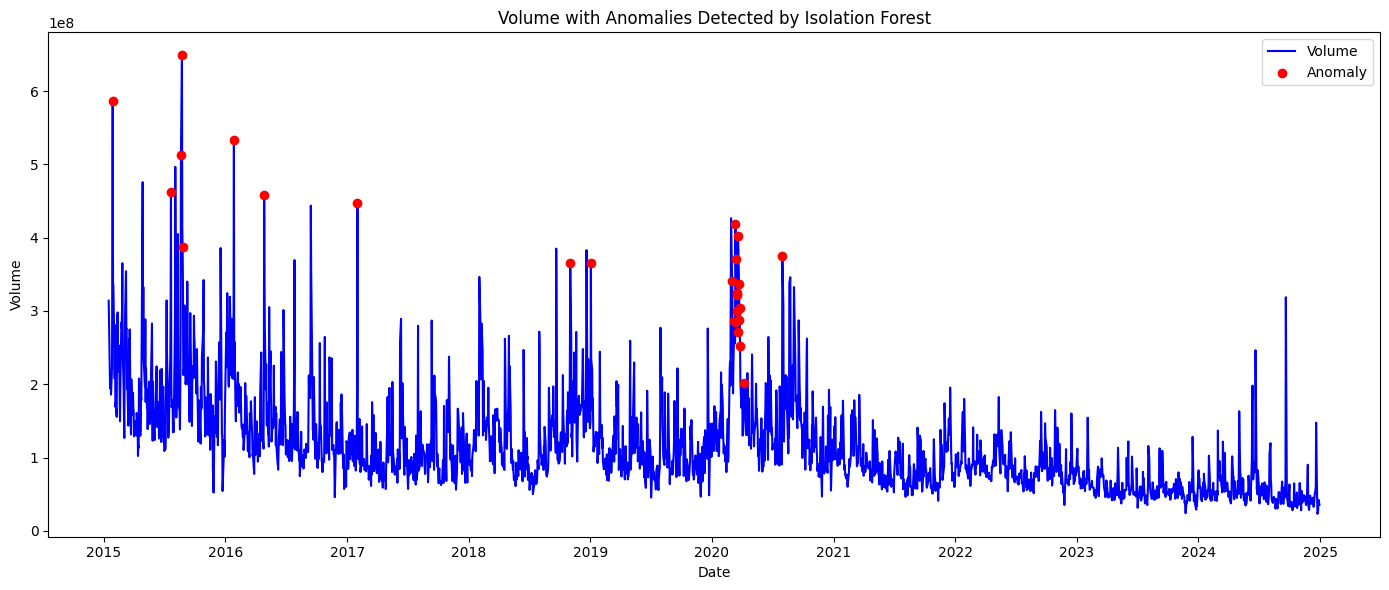

In [32]:
plt.figure(figsize=(14, 6))

plt.plot(data_clean['Date'], data_clean['Volume'], label='Volume', color='blue')
plt.scatter(data_clean[data_clean['Anomaly_IF'] == 1]['Date'],
            data_clean[data_clean['Anomaly_IF'] == 1]['Volume'],
            color='red', label='Anomaly', zorder=5)
plt.title('Volume with Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.tight_layout()
plt.show()


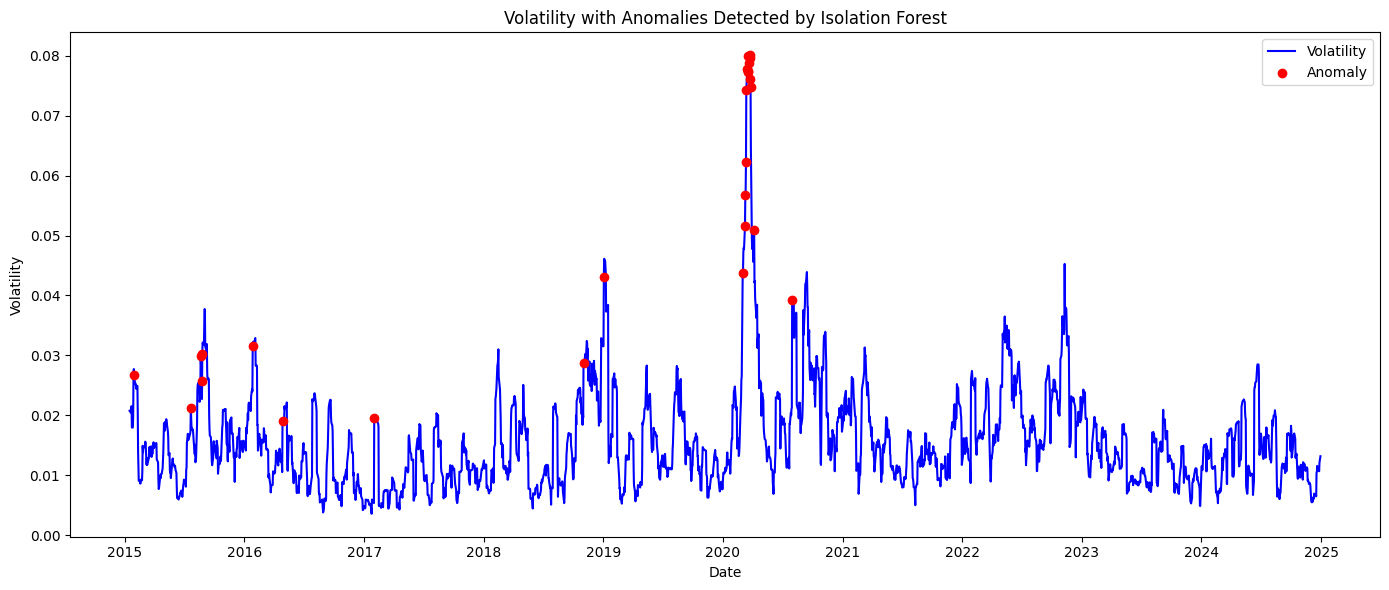

In [33]:
plt.figure(figsize=(14, 6))

plt.plot(data_clean['Date'], data_clean['Volatility'], label='Volatility', color='blue')
plt.scatter(data_clean[data_clean['Anomaly_IF'] == 1]['Date'],
            data_clean[data_clean['Anomaly_IF'] == 1]['Volatility'],
            color='red', label='Anomaly', zorder=5)
plt.title('Volatility with Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()


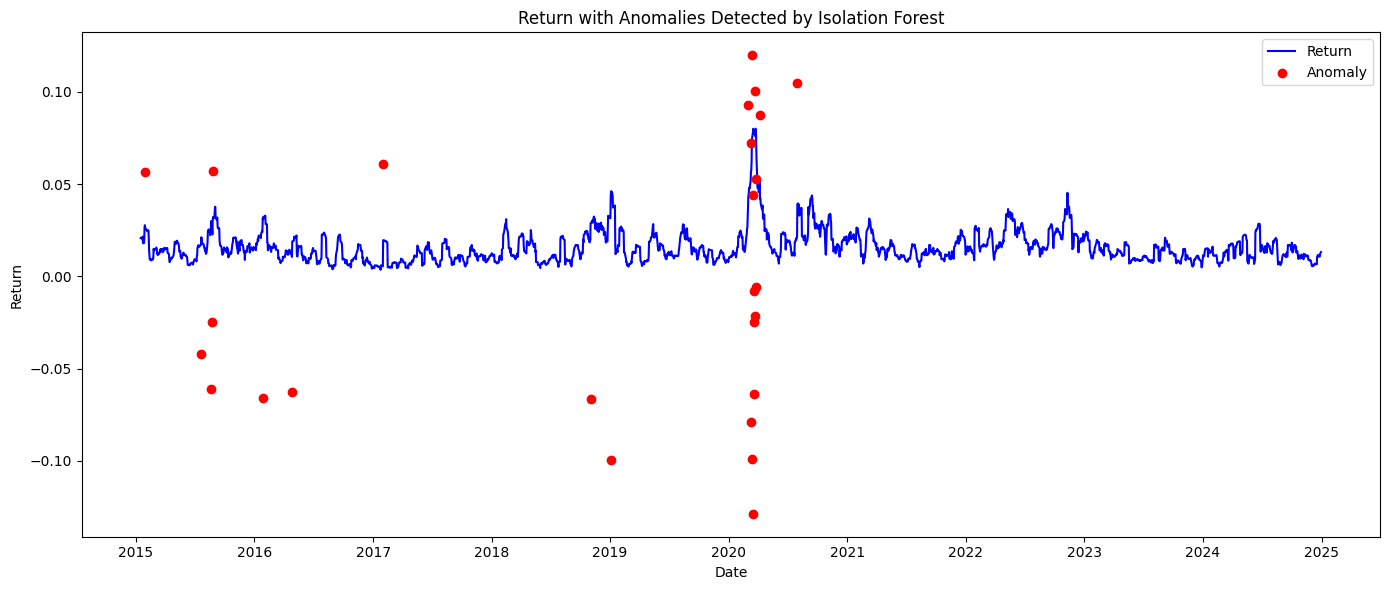

In [34]:
plt.figure(figsize=(14, 6))

plt.plot(data_clean['Date'], data_clean['Volatility'], label='Return', color='blue')
plt.scatter(data_clean[data_clean['Anomaly_IF'] == 1]['Date'],
            data_clean[data_clean['Anomaly_IF'] == 1]['Return'],
            color='red', label='Anomaly', zorder=5)
plt.title('Return with Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()
plt.show()


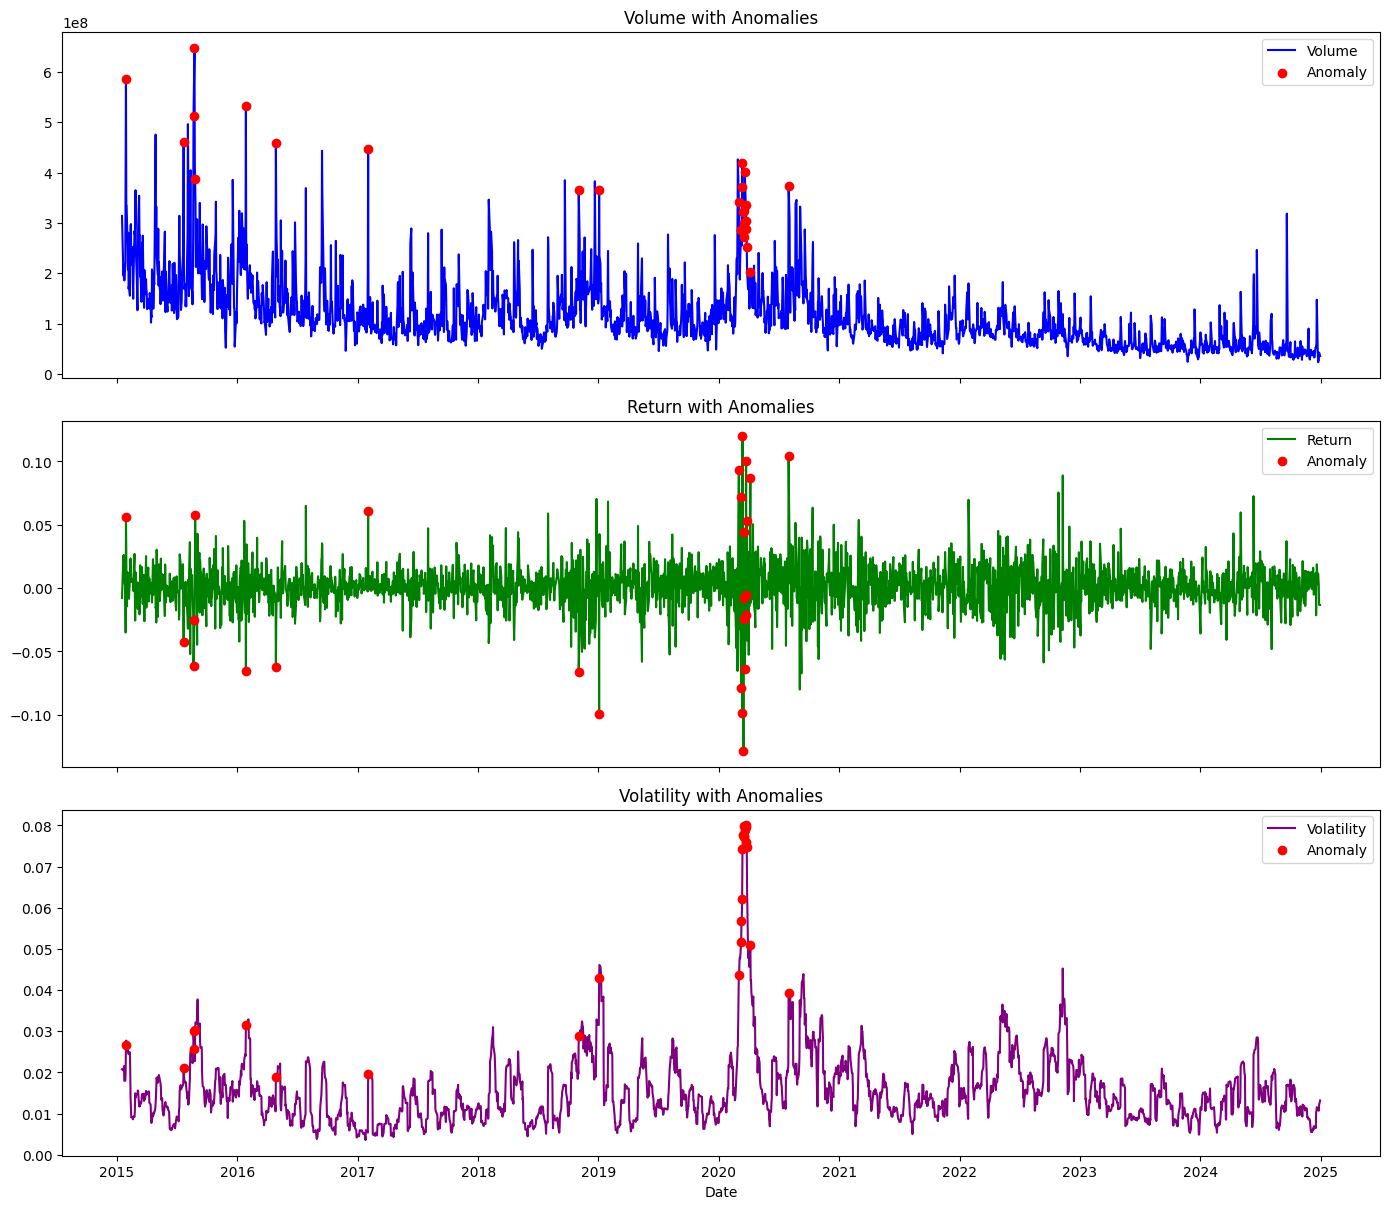

In [35]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot Volume
axs[0].plot(data_clean['Date'], data_clean['Volume'], label='Volume', color='blue')
axs[0].scatter(data_clean[data_clean['Anomaly_IF'] == 1]['Date'],
               data_clean[data_clean['Anomaly_IF'] == 1]['Volume'],
               color='red', label='Anomaly', zorder=5)
axs[0].set_title('Volume with Anomalies')
axs[0].legend()

# Plot Return
axs[1].plot(data_clean['Date'], data_clean['Return'], label='Return', color='green')
axs[1].scatter(data_clean[data_clean['Anomaly_IF'] == 1]['Date'],
               data_clean[data_clean['Anomaly_IF'] == 1]['Return'],
               color='red', label='Anomaly', zorder=5)
axs[1].set_title('Return with Anomalies')
axs[1].legend()

# Plot Volatility
axs[2].plot(data_clean['Date'], data_clean['Volatility'], label='Volatility', color='purple')
axs[2].scatter(data_clean[data_clean['Anomaly_IF'] == 1]['Date'],
               data_clean[data_clean['Anomaly_IF'] == 1]['Volatility'],
               color='red', label='Anomaly', zorder=5)
axs[2].set_title('Volatility with Anomalies')
axs[2].legend()

# Improve layout and show
plt.tight_layout()
plt.xlabel('Date')
plt.show()


In [36]:
anomalies= data_clean[data_clean['Anomaly_IF'] == 1]
normal = data_clean[data_clean['Anomaly_IF'] == 0]

comparison = pd.DataFrame({ 'Anomalies': anomalies[['Volume', 'Return', 'Volatility']].mean(),
                            'Normal': normal[['Volume', 'Return', 'Volatility']].mean()
                          })
print("Comparison of Anomalies vs. Normal Points:\n")
print(comparison)


Comparison of Anomalies vs. Normal Points:

               Anomalies        Normal
Price                                 
Volume      3.786984e+08  1.139394e+08
Return     -1.104714e-04  1.116241e-03
Volatility  5.218026e-02  1.548787e-02
